array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f656d0bd690>,
      dtype=object)

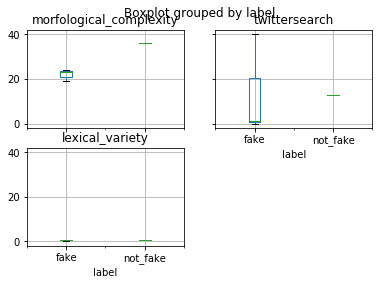

In [3]:
# scatter plot + box plot (& istogram)

# notebook:
# Legge dalla directory out/ tutti i file che ci sono (uno per feature) e mettere insieme tutto in uno stesso file
# (sicuramente la run di twitter andra' da sola e avra' un file di out a parte: si vuole unire ai file gia' presenti delle altre features:
# pandas.join... Metti tutto in un file solo, e poi fai i vari plot.

import os, pandas

''' FILE IMPORT & JOIN '''
# files from "features_exploration" out (.csv)
out_path = ".." + os.sep + "out" + os.sep
dataframes = []
features = []

# reads file (= features names = column name)
for result_file in os.listdir(out_path):
    features.append(result_file)
    dataframes.append(pandas.read_csv(out_path + result_file))

# directory not empty check
if len(dataframes) == 0:
    print("No csv files in " + out_path)
    exit(1)
    
# joins all data!
final_data = dataframes[0]
for dataframe in dataframes[1:]:
    final_data = pandas.merge(final_data, dataframe, suffixes=("", "_fn"), on="id", how="outer")
    
# picks only id, label and features columns (mergeing produces also a lot of junk)
columns = ["id", "label"]
columns.extend(features)
final_data = final_data[columns]


''' PLOTTING RESULTS '''

# boxplot: distribution of fake - not_fake for every feature
final_data.boxplot(by="label", column=features)